In [63]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as datetime
import pandas as pd

import matplotlib 
import seaborn as sb
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [61]:
#Use SQLAlchemy create_engine to connect to your sqlite database.

engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Station = Base.classes.stations
Measurements = Base.classes.measurements

In [5]:
#Starting session

session = Session(engine)

In [104]:
#Find the latest date
late = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(late)

('2017-08-23',)


In [105]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.

prec = session.query(Measurements.date, Measurements.prcp).\
        filter(Measurements.date >= '2016-08-23').filter(Measurements.date <= '2017-08-23').order_by(Measurements.date).all()

In [106]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
prec_df = pd.DataFrame(perc)
prec_df.head()

,date,prcp
0,2017-04-28,0.00
1,2017-04-28,2.60
2,2017-04-28,0.09
3,2017-04-28,0.00
4,2017-04-28,0.00


In [107]:
prec_dfx = prec_df.set_index('date')
prec_dfx.head()

,prcp
date,
2017-04-28,0.00
2017-04-28,2.60
2017-04-28,0.09
2017-04-28,0.00
2017-04-28,0.00


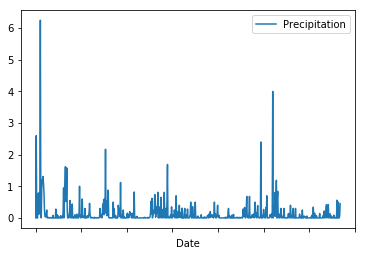

In [108]:
# Plot the results using the DataFrame plot method.
# plot the dataframe
prec_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.legend(["Precipitation"])
plt.show()



In [109]:
#Station Analysis

#Design a query to calculate the total number of stations.

stat = session.query(Measurements).group_by(Measurements.station).count()
print("Total number of stations: {}".format(stat))


Total number of stations: 9


In [110]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
most_act = session.query(Measurements.station, func.count(Measurements.station)).\
        group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

print(most_act)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [111]:
# Now we want to get the most active to store as variable so we want to put it in a df first
most_act_df = pd.DataFrame(data=most_act, columns=['Station', 'Count'])
most_act_df.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [112]:
most_actx = most_act_df.head(1)

print(most_actx)

       Station  Count
0  USC00519281   2772


In [113]:
#Which station has the highest number of observations?
most_actz = most_actx['Station'][0]

print(most_actz)

USC00519281


In [120]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.

temp = session.query(Measurements.tobs).\
    filter(Measurements.date >= '2016-08-23').\
    filter(Measurements.station == most_actz).\
    order_by(Measurements.tobs).all()
    
print(temp)


[(59,), (59,), (59,), (60,), (60,), (61,), (62,), (62,), (62,), (62,), (62,), (62,), (63,), (63,), (63,), (63,), (64,), (64,), (64,), (65,), (65,), (65,), (65,), (65,), (65,), (65,), (66,), (66,), (66,), (66,), (66,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (67,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (68,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (69,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (70,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (71,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (72,), (73,), (73,), (73,), (73,)

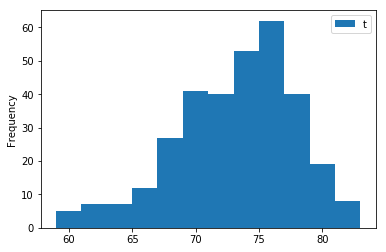

In [123]:
#Plot the results as a histogram with bins=12.

temp_df=pd.DataFrame(temp)
plt.hist(temp_df['tobs'],12)
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

In [126]:
#Temperature Analysis


#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")



def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    
    
temp_range = (calc_temps('2017-01-01', '2018-01-01'))
print(temp_range)

[(58, 74.14387974230493, 87)]


In [ ]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


